In [2]:
from scipy.stats import binom

In [3]:
binom_h0 = binom(
    n = 30, #колво испытаний
    p = 0.5 #вероятность успеха
)
binom_h0.rvs(1)

array([13])

In [6]:
binom_h0.pmf(24)

0.0005529960617423065

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x_label = np.arange(1, 31, 1)
probs = binom_h0.pmf(x_label)

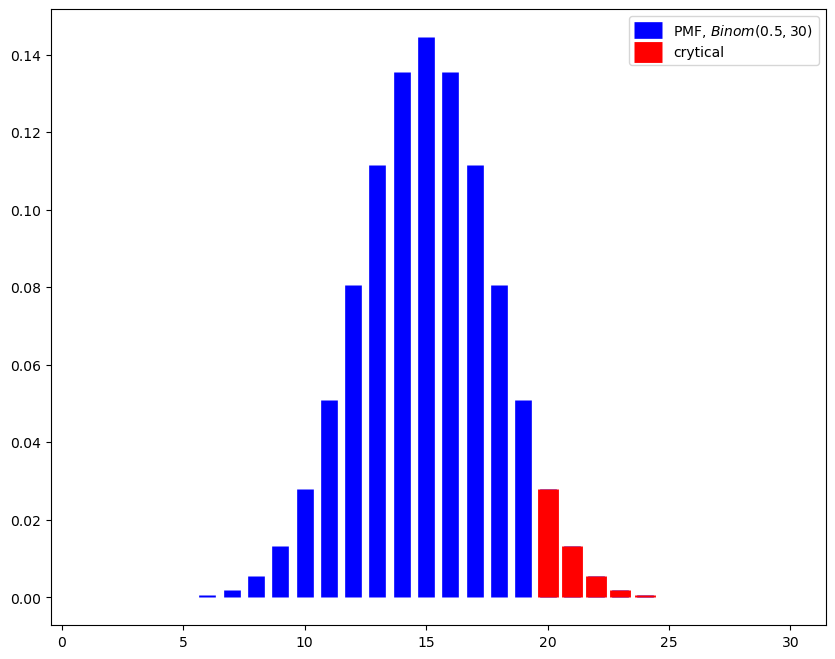

In [9]:
plt.figure(figsize=(10, 8))
plt.vlines(x_label, 0, probs, linewidth = 12, color = 'blue', label = 'PMF, $Binom(0.5, 30)$')
crit_reg = x_label >= 20
plt.vlines(x_label[crit_reg], 0, probs[crit_reg], linewidth = 15.0, color = 'red', label = 'crytical')
plt.legend()
plt.show()


In [12]:
np.sum(probs[crit_reg])

0.049368573352694636

In [14]:
crit_reg = x_label >= 20
np.sum(probs[crit_reg])

0.049368573352694636

In [16]:
binom_h0.cdf(19)

0.9506314266473055

Что делают основные функции, связанные с распределением? 

`cdf` - находит "площадь" распределения до точки, которая передана в параметре вызова данной функции

`ppf` - сюда передается перцинтиль распределения и функция возвращает точку - 1, в которой этот перцентиль будет достигаться

`rvs` - генерирует рандомную выборку из распределения (в параметры можно передать кол-во элементов выборки)

`pmf` - вычисляет вероятность попасть в данную точку, как параметр передается эта точка

In [19]:
binom_h0.ppf(0.95)

19.0

In [67]:
def make_binom_criterion(n, mu, alpha):
    binom_h0 = binom(n=n, p=mu)
    q = binom_h0.ppf(1 - alpha)
    return q + 1

make_binom_criterion строит критерий для залачи с доставкой.

Параметры:

    n: колво доставок
    mu: вероятность успеха в нулевой гипотезе
    alpha: уровень знаичмости критерия
Возвращает:

    С для критерия S = (q >= C)

In [72]:
print('if Q >=', make_binom_criterion(
    n=30,
    mu = 0.5,
    alpha=0.05), 'then reject H0')

if Q >= 20.0 then reject H0


In [74]:
binom_h0 = binom(
    n=50,
    p=0.1)

In [86]:
binom_h0.rvs(5)

array([9, 5, 2, 4, 2])

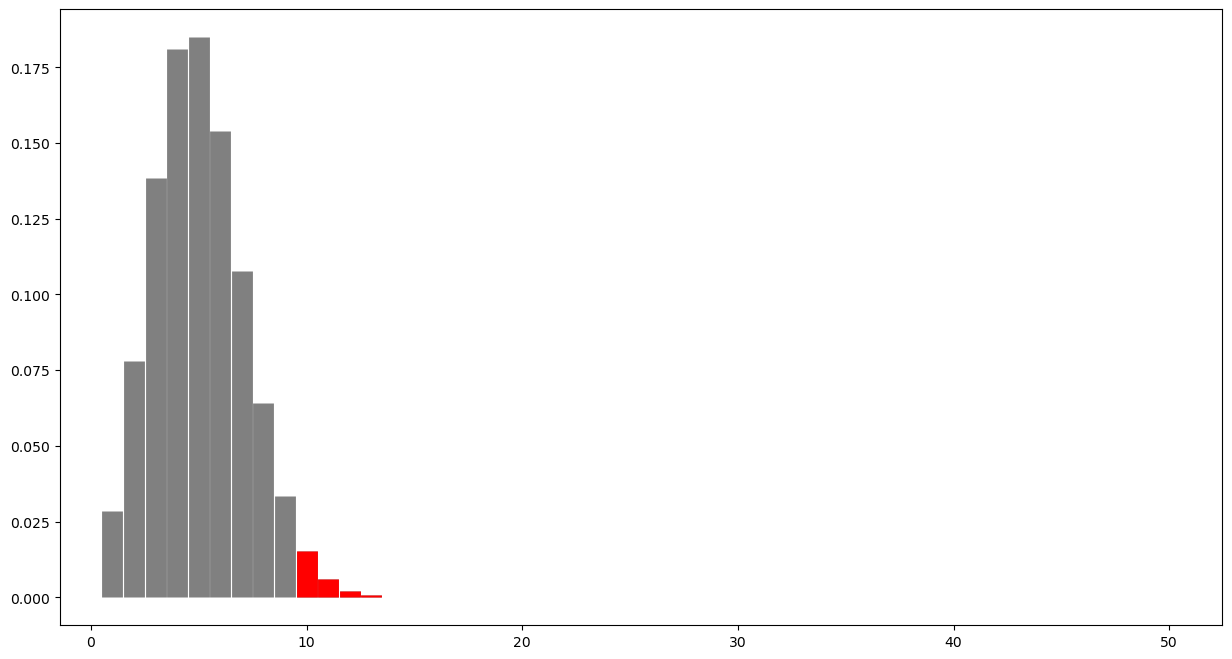

In [88]:
x_grid = np.arange(1, 51, 1)
y_grid = binom_h0.pmf(x_grid)
plt.figure(figsize=(15,8))
plt.vlines(x_grid, 0, y_grid, linewidth=15, color='grey')
crit_reg = x_grid >= make_binom_criterion(n=50, mu=0.1, alpha=0.05)
plt.vlines(x_grid[crit_reg], 0, y_grid[crit_reg], linewidth=15, color='red')
plt.show()

In [90]:
def make_binom_criterion(n, mu, alpha):
    binom_h0 = binom(n=n, p=mu)
    q = binom_h0.ppf(1 - alpha) + 1
    return q

In [92]:
print(f'if Q >=', make_binom_criterion(
    n=50,
    mu = 0.1,
    alpha=0.05), 'then reject H0')

if Q >= 10.0 then reject H0


pvalue_binom считает p-value для задач с доставкой

Параметры:

n: колво доставок
mu: вероятность успеха в нулевой гипотезе
q: колво успешных доставок 

Возвращает:

p-value для критерия S = (|Q - 15| >= C)


In [99]:
def pvalue_binom(n, mu, q):
    binom_h0 = binom(n=n, p=mu)
    return 1 - binom_h0.cdf(q - 1)
alpha = 0.05
print(f'if {pvalue_binom(n=30, mu=0.5, q=19):0.4} <= {alpha}, reject h0')

if 0.1002 <= 0.05, reject h0


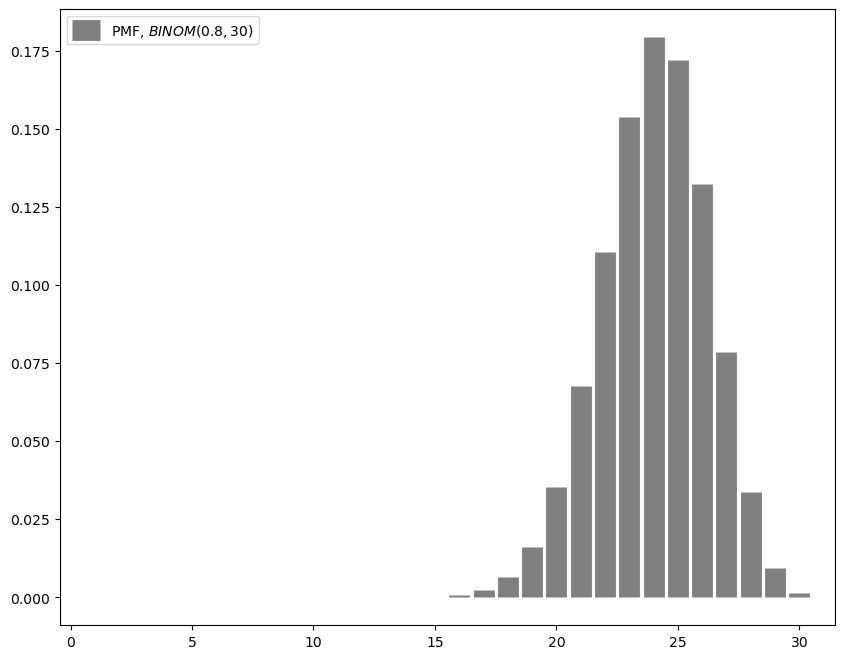

In [19]:
binom_h0_nonsym = binom(n=30, p=0.8)
x_grid1 = np.arange(1, 31, 1)
y_grid1 = binom_h0_nonsym.pmf(x_grid1)

plt.figure(figsize=(10,8))
plt.vlines(x_grid1, 0, y_grid1, linewidth = 15, color='grey', label='PMF, $BINOM(0.8, 30)$')
plt.legend(loc='upper left')
plt.show()

In [103]:
def pvalue_two_sides(n, q, mu=0.5):
    binom_h0 = binom(n=n, p=mu)
    pvalue_left = binom_h0.cdf(q)
    pvalue_right = 1 - binom_h0.cdf(q)
    return 2 * min(pvalue_left, pvalue_right, 0.5)

In [109]:
pvalue = pvalue_two_sides(n=30, q=28, mu=0.8)
pvalue

0.02104498066785143

In [111]:
if pvalue >= 0.05:
    print('reject H0')
else:
    print('not reject H0')

not reject H0


In [121]:
critical_value = 20
power = 1 - binom(n=30, p=0.6).cdf(critical_value - 1)
fpr = 1 - binom(n=30, p=0.5).cdf(critical_value - 1)
power

0.2914718612234968

In [24]:
fpr

0.04936857335269451

In [123]:
def get_stat_power(N, mu_h0, mu_factual, alpha):
    binom_h0 = binom(n=N, p=mu_h0)
    binom_factual = binom(n=N, p=mu_factual)
    critical_value = binom_h0.ppf(1 - alpha) + 1
    return 1 - binom_factual.cdf(critical_value - 1)

Функция get_stat_power вычисляет мощность критерия бета для биноминального распределения, при условии что нулевая гипотеза не подтвердилась, что верна гипотеза Н1. ppf - считает, на каком значении сумма всех вероятностей биноминального распредения будет равна 1 - альфа, а cdf вычисляет площадь фигуры под графиком (сумму вероятностей) в фактическом распределении начиная с критическог значения для распределения 0-ой гипотезы

In [130]:
N=30
power_deliver = get_stat_power(N, mu_h0=0.5, mu_factual=0.6, alpha=0.05)
power_deliver

0.2914718612234968

In [132]:
def min_n(N):
    power_deliver_min = get_stat_power(N, mu_h0=0.5, mu_factual=0.6, alpha=0.05)
    while power_deliver_min <= 0.8:
        N += 1
        power_deliver_min = get_stat_power(N, mu_h0=0.5, mu_factual=0.6, alpha=0.05)
    return N
min_n(0)

158

In [28]:
get_stat_power(N, mu_h0=0.5, mu_factual=0.6, alpha=0.05)

0.2914718612234968

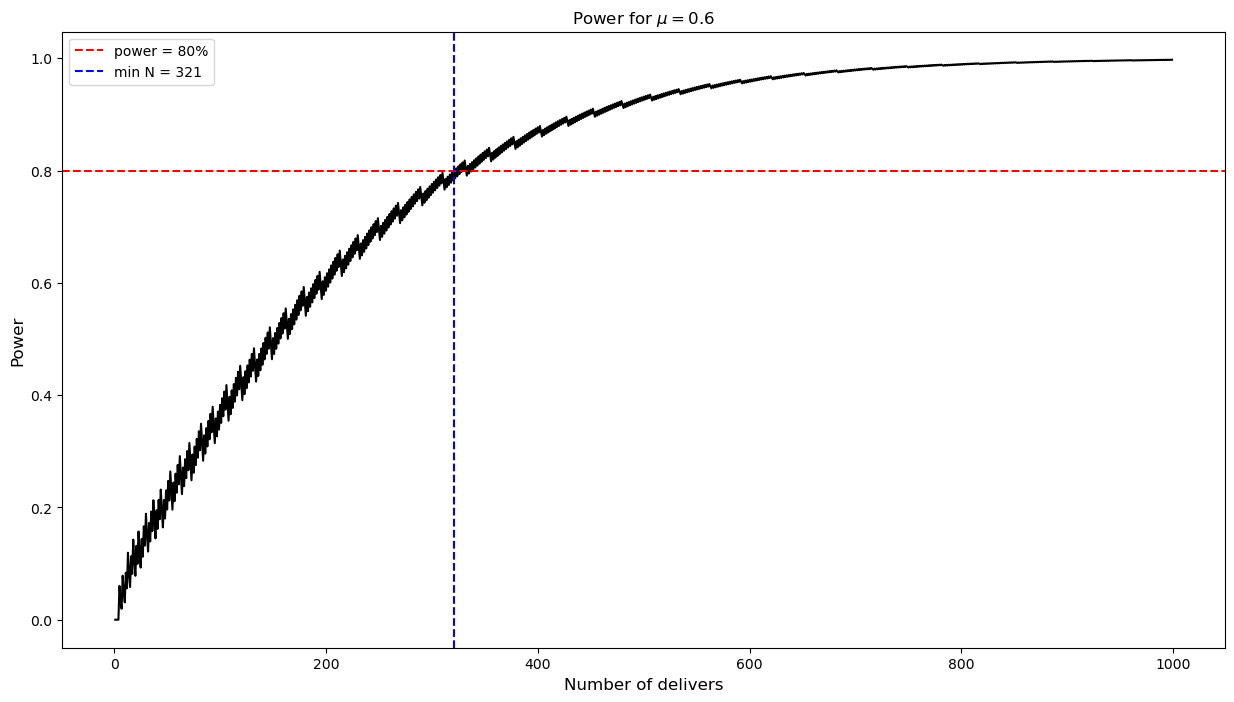

In [29]:
x_grid = np.arange(1, 1000, 1)
y_grid = get_stat_power(N=x_grid, mu_h0=0.5, mu_factual=0.57, alpha=0.05)

plt.figure(figsize=(15, 8))
plt.title('Power for $\mu = 0.6$', fontsize=12)
plt.xlabel('Number of delivers', fontsize=12)
plt.ylabel('Power', fontsize=12)

plt.plot(x_grid, y_grid, color='black')
minn = min_n(0)
minm = x_grid[y_grid >= 0.8].min()
plt.axhline(0.8, ls='--', color='red', label='power = 80%')
plt.axvline(minm, ls='--', color='blue', label=f'min N = {minm}')
plt.legend()

Выше указан график который показывает нам какое мнимальное количество эксперриментов должно быть выполнено, при условии, что известно $\mu$ factual, чтобы получить мощность `БОЛЬШЕ 80 %`

Далее построим график зависимости $\mu$ от мощности `POWER`:

In [30]:
nu_grid = np.linspace(0.5, 1, 500)
power = get_stat_power(N=30, mu_h0=0.5, mu_factual=nu_grid, alpha=0.05)

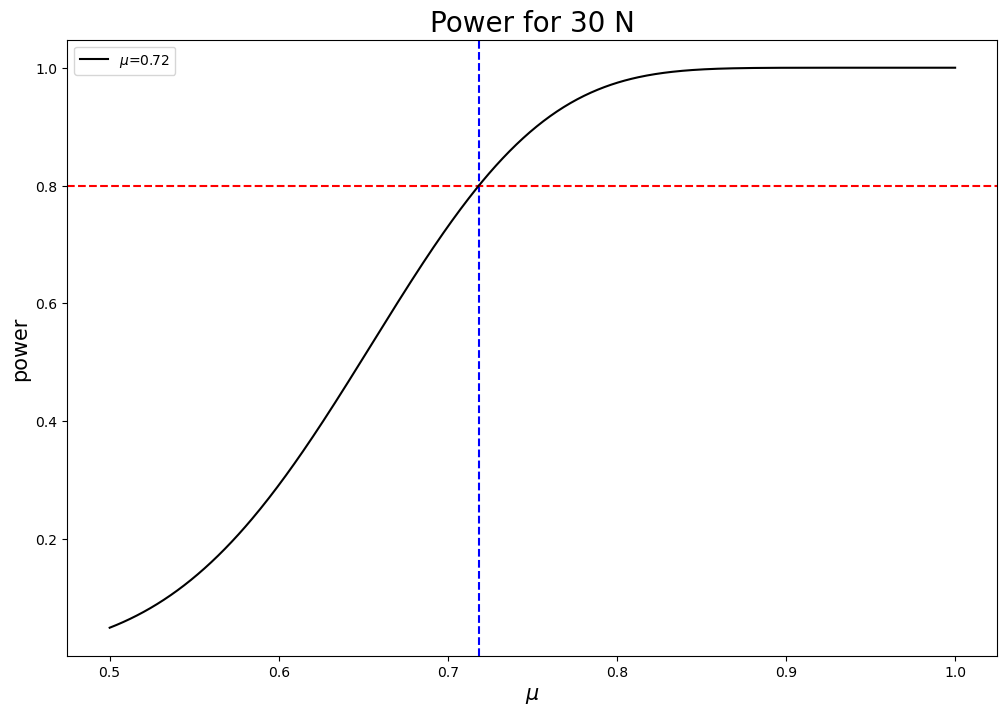

In [31]:
plt.figure(figsize=(12, 8))
plt.title('Power for 30 N', fontsize = 20)
plt.xlabel('$\mu$', fontsize = 15)
plt.ylabel('power', fontsize = 15)

min_mu = nu_grid[power>=0.8].min()
plt.axvline(min_mu, ls='--', color='blue')
plt.axhline(0.8, ls='--', color='red')
plt.plot(nu_grid, power, color='black', label='$\mu$={:.2f}'.format(min_mu))
plt.legend()
plt.show()

Далее напишем функцию для вычисления `MDE` - минимальный детектируемый эффект

In [134]:
def binom_test_mde(N, mu0, alpha=0.05, min_power=0.8):
    delta_grid = np.linspace(0, 1 - mu0, 500)
    power = get_stat_power(N, mu0, mu0 + delta_grid, alpha)
    fit_delta = delta_grid[power >= min_power]
    return fit_delta[0]
binom_test_mde(N=300, mu0=0.5, alpha=0.05, min_power=0.8)

0.07314629258517033

Делаем обычный перебор с помощью лиспэйс. Потом считаем мощность для каждого значения из `delta_grid`.
Далее ищем нужный нам `MDE` в масиве `fit_delta` и возвращаем первое его значение

In [33]:
def two_sided_criterion_critical_value(N, mu0, alpha):
    binom_h0 = binom(n=N, p=mu0)
    c1 = binom_h0.ppf(alpha / 2) - 1
    c2 = binom_h0.ppf(1 - alpha / 2) + 1
    return c1, c2
success_cnt = 24
mu_grid = np.arange(0, 1, 0.001)
mu_no_rejection = []
for mu_h0 in mu_grid:
    c1, c2 = two_sided_criterion_critical_value(30, mu_h0, alpha=0.10)
    if success_cnt > c1 and success_cnt < c2:
        mu_no_rejection.append(mu_h0)
print('95 interval: {} -- {}'.format(min(mu_no_rejection), max(mu_no_rejection)))

95 interval: 0.643 -- 0.909


Далее строим `Доверительный интервал Уилсона`, который вычисляет приближенные значения

In [139]:
from statsmodels.stats.proportion import proportion_confint

In [141]:
np.random.seed(202312)

In [143]:
N_EXPERIMENTS = 10000
SAMPLE_SIZE = 30
mu_factual = 0.5
binom_true = binom(n=SAMPLE_SIZE, p=mu_factual)

confit_fail_cases = 0

for i in range(N_EXPERIMENTS):
    q = binom_true.rvs()
    L, R = proportion_confint(
    count=q,
    nobs=SAMPLE_SIZE,
    alpha=0.10,
    method='wilson'
    )
    if L <= mu_factual <= R:
        pass
    else:
        confit_fail_cases += 1
        
print(1 - confit_fail_cases / N_EXPERIMENTS)

0.9005


In [165]:
proportion_confint(count = binom_true.rvs(), nobs=30, alpha=0.05, method='wilson')

(0.30232388907699753, 0.638577003801267)

In [216]:
binom_rv = binom(n=100, p=0.8)
q = 60
proportion_confint(count=q, nobs=101, alpha=0.05, method='wilson')

(0.4965498746021546, 0.684676142411734)